In [9]:
# XGB model for regression
import xgboost as xgb
from custom_XGBoost_v2 import CustomXGBoost
from custom_random_forest import CustomRandomForest
from sklearn.metrics import mean_squared_error
from custom_functions import cross_val_data_reg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [2]:
# Importing the dataset
file_path = 'P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v8.csv'
df = pd.read_csv(file_path)
dataset = df.copy()
dataset.head()

,Foldername,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006_S1_,FROPCOM0006_S2_,FROPCOM0006_S3_,FROPCOM0006_S4_,...,FROPCOM0004_SQ010_SQ002__nan,FROPCOM0004_SQ010_SQ003__0_5_0_0,FROPCOM0004_SQ010_SQ003__1_0_0,FROPCOM0004_SQ010_SQ003__1_0_1,FROPCOM0004_SQ010_SQ003__10_0_0,FROPCOM0004_SQ010_SQ003__nan,Frailty_Score,Frailty_State,grip_left_hand,grip_right_hand
0,DUP002BME,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,7,0,NaN,NaN
1,FRA001AMA,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,4,1,21.5,19.3
2,FRA002CTI,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,9,0,23.2,22.5
3,FRA003BMG,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,7,0,17.7,17.4
4,FRA004LHN,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,8,0,35.0,40.0


In [5]:
dataset.drop(['Foldername'], axis=1, inplace=True)

In [3]:
# models
xgb_reg = CustomXGBoost(task='regression', 
                        objective ='reg:squarederror', colsample_bytree = 0.3, 
                        learning_rate = 0.1, 
                        random_state=42, 
                        max_depth = 5, 
                        alpha = 10, 
                        n_estimators = 100)

In [11]:
models = {
    'xgb_reg': CustomXGBoost(task='regression'),
    #'rf': CustomRandomForest()
}

In [6]:
# cross validation
n_splits = 5
model_metrics = {}

# Initialize lists to store metrics for each fold
mse_list = []
rmse_list = []
mae_list = []

for X_train, X_test, y_train, y_test in cross_val_data_reg(dataset, n_splits):


    xgb_reg.fit(X_train, y_train)

    y_pred = xgb_reg.predict(X_test)

    metrics = xgb_reg.get_metrics(y_test, y_pred)

    # Store metrics for this fold
    mse_list.append(metrics['MSE'])
    rmse_list.append(metrics['RMSE'])
    mae_list.append(metrics['MAE'])
    

# Calculate mean and standard deviation for each metric
mse_mean, mse_std = np.mean(mse_list), np.std(mse_list)
rmse_mean, rmse_std = np.mean(rmse_list), np.std(rmse_list)
mae_mean, mae_std = np.mean(mae_list), np.std(mae_list)

# Print the averaged metrics
print(f'Average MSE: {mse_mean} +/- {mse_std}')
print(f'Average RMSE: {rmse_mean} +/- {rmse_std}')
print(f'Average MAE: {mae_mean} +/- {mae_std}')



Average MSE: 1.5098359319750125 +/- 0.43273703174945694
Average RMSE: 1.2145732615305225 +/- 0.18613899201973197
Average MAE: 1.0155873554631285 +/- 0.17126553286817567


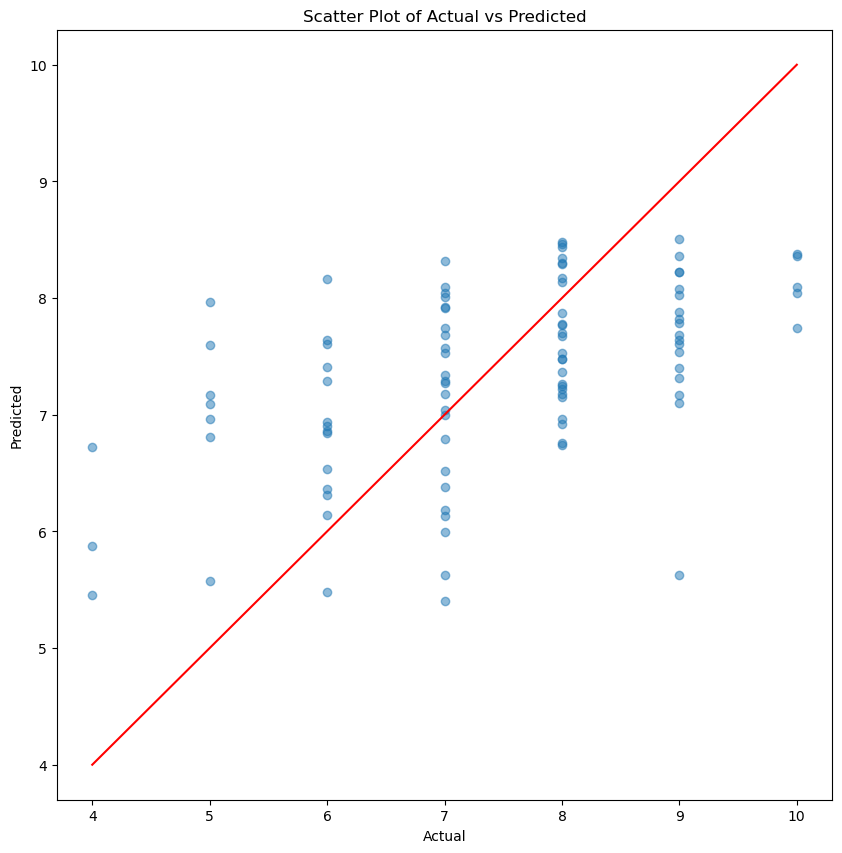

In [8]:
# Initialize empty lists to store all y_test and y_pred values from each fold
all_y_test = []
all_y_pred = []

# Same cross-validation loop as before
for X_train, X_test, y_train, y_test in cross_val_data_reg(dataset, n_splits):

    xgb_reg.fit(X_train, y_train)

    y_pred = xgb_reg.predict(X_test)

    # Append y_test and y_pred values to all_y_test and all_y_pred
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(all_y_test, all_y_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], 'r')  # Diagonal line
plt.show()


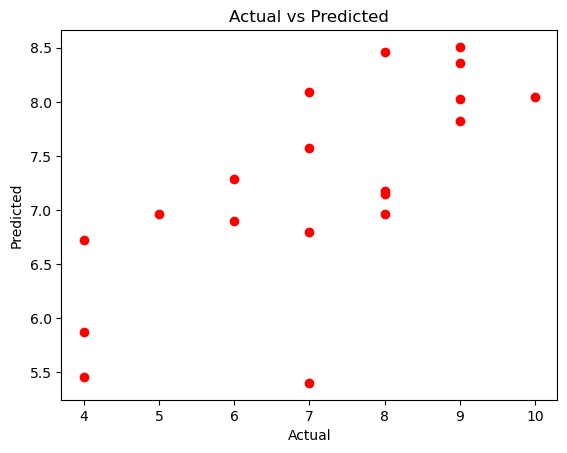

In [7]:
# plot a scatter plot
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [19]:
# Grid Search
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [10, 20, 30, 50],
    'max_depth': [4, 6, 8, 10],
    'eta' : [0.01, 0.1, 0.2],
    'gamma' : [0, 0.1, 0.2],
    'min_child_weight' : [1, 2, 3],

    
}

In [24]:
# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', cv=2, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(X_train, y_train)



Fitting 2 folds for each of 1296 candidates, totalling 2592 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'eta': [0.01, 0.1, 0.2], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 8, 10],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [10, 20, 30, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [14]:
# Print the best parameters and lowest RMSE 
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
Lowest RMSE found:  1.3395758334330679


In [23]:

# Initialize empty lists to store all y_test and y_pred values from each fold
all_y_test = []
all_y_pred = []

# Best parameters from your GridSearchCV
best_params = grid_mse.best_params_

# Initialize the model with the best parameters
gbm_best = xgb.XGBRegressor(objective='reg:squarederror', **best_params)

# Loop through each fold using your custom function
for X_train, X_test, y_train, y_test in cross_val_data_reg(dataset, n_splits=5):

    # Fit the model using the best parameters
    gbm_best.fit(X_train, y_train)
    
    # Make predictions
    y_pred = gbm_best.predict(X_test)

    # Append to all_y_test and all_y_pred for scatter plot
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

# Scatter plot for all folds
plt.figure(figsize=(10, 10))
plt.scatter(all_y_test, all_y_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted (All Folds, Optimized Model)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], 'r')  # Diagonal line
plt.show()


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

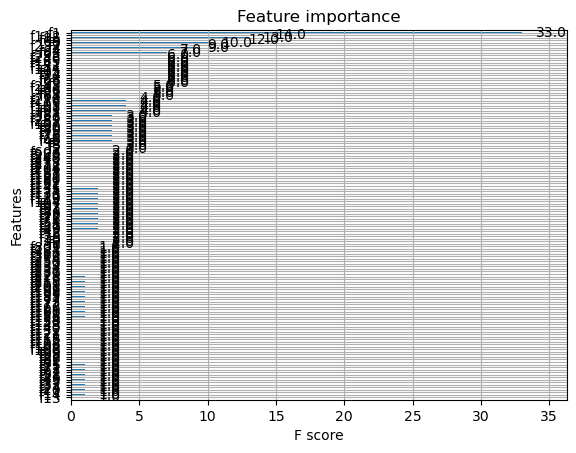

In [18]:
# Plot the feature importances
xgb.plot_importance(grid_mse.best_estimator_)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# Initialize empty lists to store all y_test and y_pred values from each fold
all_y_test = []
all_y_pred = []

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use the best parameters from your grid search
best_params = grid_mse.best_params_
gbm_best = xgb.XGBRegressor(objective='reg:squarederror', **best_params)

# Loop through each fold
for train_index, test_index in kf.split(dataset):

    X_train_fold, X_test_fold = dataset.iloc[train_index], dataset.iloc[test_index]
    y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]

    # Fit the model using the best parameters
    gbm_best.fit(X_train_fold, y_train_fold)
    
    # Make predictions
    y_pred_fold = gbm_best.predict(X_test_fold)

    # Append to all_y_test and all_y_pred for scatter plot
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_fold)

# Scatter plot for all folds
plt.figure(figsize=(10, 10))
plt.scatter(all_y_test, all_y_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted (All Folds, Optimized Model)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], 'r')  # Diagonal line
plt.show()
